In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from collections import defaultdict
from common import Fonts, Images, NWSL, Colors, add_twitter_handle

In [6]:
signed = pd.read_csv("nwsl/signed.csv")
signed

,player,team_old,team_new
0,Adriana,NaN,ORL
1,Alexa Spaanstra,NaN,KC
2,Ally Schlegel,NaN,CHI
3,Alyssa Thompson,NaN,LA
4,Angelina Anderson,NaN,LA
5,Ary Borges,NaN,LOU
6,Bárbara Olivieri,NaN,HOU
7,Carly Nelson,NaN,ORL
8,Chloe Ricketts,NaN,WAS
9,Civana Kuhlmann,NaN,WAS


In [7]:
draft = list(pd.read_csv("nwsl/2023_draft.csv")["player"])
draft

['Alyssa Thompson',
 'Michelle Cooper',
 'Emily Madril',
 'Jenna Nighswonger',
 'Reyna Reyes',
 'Olivia Wingate',
 'Penelope Hocking',
 'Sydney Collins',
 'Clara Robbins',
 'Alexa Spaanstra',
 'Haley Hopkins',
 "Izzy D'Aquila",
 'Sierra Enge',
 'Grace Yochum',
 'Gabby Robinson',
 'Kayla Fischer',
 'Brianna Martinez',
 'Jordan Silkowitz',
 'Shae Holmes',
 'Sophie Hirst',
 'Messiah Bright',
 'Jyllissa Harris',
 'Ally Schlegel',
 'Lauren DeBeau',
 'Tori Hansen',
 'Nicole Douglas',
 'Angelina Anderson',
 'Lyza Bosselmann',
 'Jadyn Edwards',
 'Riley Tanner',
 'Riley Parker',
 'Lauren Kozal',
 'Lauren Brzykcy',
 'Lena Silano',
 'Mykiaa Minniss',
 'Lindsi Jennings',
 'Civana Kuhlmann',
 'Ella Shamburger',
 'Summer Yates',
 'Delaney Graham',
 'Kristen Scott',
 'Rylan Childers',
 'Sophie Jones',
 'Iliana Hocking',
 'Giovanna DeMarco',
 'Natalie Viggiano',
 'Ashley Orkus',
 'Madelyn Desiano']

In [8]:
signed["is_draft_pick"] = signed["player"].apply(lambda x: x in draft)
signed

,player,team_old,team_new,is_draft_pick
0,Adriana,NaN,ORL,False
1,Alexa Spaanstra,NaN,KC,True
2,Ally Schlegel,NaN,CHI,True
3,Alyssa Thompson,NaN,LA,True
4,Angelina Anderson,NaN,LA,True
5,Ary Borges,NaN,LOU,False
6,Bárbara Olivieri,NaN,HOU,False
7,Carly Nelson,NaN,ORL,False
8,Chloe Ricketts,NaN,WAS,False
9,Civana Kuhlmann,NaN,WAS,True


In [23]:
draft_agg = (
    signed.groupby(["team_new"])
    .agg({"is_draft_pick": "sum"})
    .rename(columns={"is_draft_pick": "draftee_count"})
    .reset_index()
)
draft_agg

,team_new,draftee_count
0,CHI,3
1,HOU,4
2,KC,5
3,LA,2
4,LOU,2
5,NC,4
6,NJY,1
7,ORL,3
8,POR,2
9,RGN,0


In [24]:
signed_agg = (
    signed.groupby(["team_new"])
    .agg({"is_draft_pick": "count"})
    .rename(columns={"is_draft_pick": "signed_count"})
    .reset_index()
)
signed_agg

,team_new,signed_count
0,CHI,4
1,HOU,6
2,KC,7
3,LA,3
4,LOU,5
5,NC,6
6,NJY,3
7,ORL,5
8,POR,2
9,RGN,1


In [35]:
df = signed_agg.set_index("team_new").join(draft_agg.set_index("team_new")).sort_values(
    "signed_count", ascending=False
)
df.index.name = "team"
df["color"] = list(map(lambda x: NWSL.color(x), list(df.index)))
df

,signed_count,draftee_count,color
team,,,
WAS,9,5,#000000
KC,7,5,#62cac9
HOU,6,4,#ff6a01
NC,6,4,#d7c38b
LOU,5,2,#c5b4e1
ORL,5,3,#60269e
CHI,4,3,#3cb5e4
LA,3,2,#f8d5ce
NJY,3,1,#a9f1f5


<Figure size 720x576 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

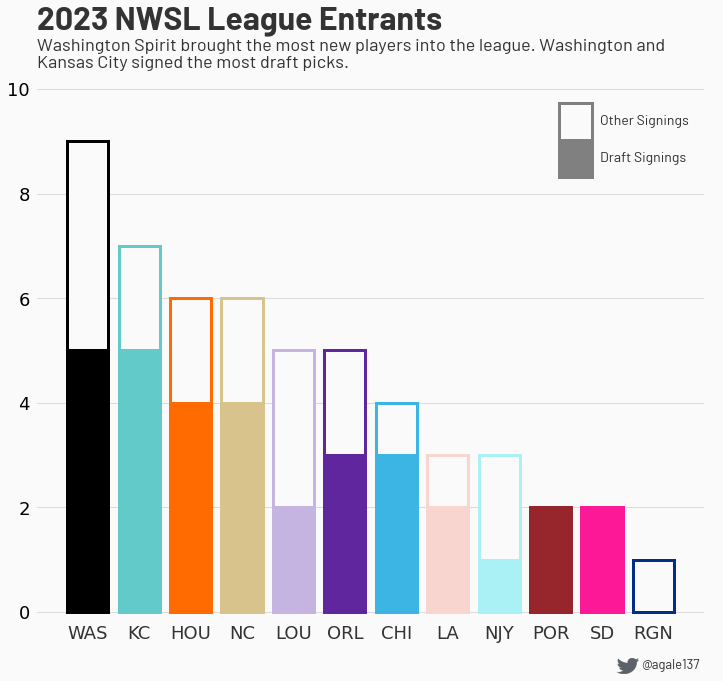

In [113]:
# Draw the plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=200)
fig, ax = plt.subplots()
fig.tight_layout()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

# Plot data
ax.bar(df.index, df["signed_count"], ec=df["color"], fc=Colors.WHITE, linewidth=3)
ax.bar(df.index, df["draftee_count"], ec=df["color"], color=df["color"], linewidth=3)

# Axes
ax.set_ylim(-0.1, 10.1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="major", labelsize=18)
ax.tick_params(axis="x", which="major", labelsize=18, labelcolor=Colors.BLACK)

# Title
plt.title(
    "2023 NWSL League Entrants",
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0,
    y=1.09,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
fig.text(
    0,
    1.03,
    "Washington Spirit brought the most new players into the league. Washington and\nKansas City signed the most draft picks.",
    fontproperties=Fonts.BARLOW,
    size=18,
    transform=ax.transAxes,
    ha="left",
    color=Colors.BLACK,
)

# Legend
ax2 = fig.add_axes([0.75, 0.78, 0.23, 0.2])
ax2.set_xlim([-0.5, 4.6])
ax2.set_ylim([-0.5, 2.6])
ax2.add_patch(
    patches.Rectangle(
        (0, 0), 1, 2, linewidth=3, edgecolor=Colors.GRAY, facecolor=Colors.WHITE
    )
)
ax2.add_patch(
    patches.Rectangle(
        (0, 0), 1, 1, linewidth=3, edgecolor=Colors.GRAY, facecolor=Colors.GRAY
    )
)
ax2.text(
    1.25,
    1.5,
    "Other Signings",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=14,
    va="center",
)
ax2.text(
    1.25,
    0.5,
    "Draft Signings",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=14,
    va="center",
)
ax2.axis("off")

add_twitter_handle(fig, x=0.85, y=-0.05, fs=13, w=0.03)

# Save image
plt.savefig("2023_draftees.png", bbox_inches="tight", pad_inches=0.5, dpi=400)